In [1]:
import scipy
from msi_visual.normalization import spatial_total_ion_count, total_ion_count, median_ion
import glob
import numpy as np
import umap
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def norm_umap_channel(channel):
    channel = channel - np.percentile(channel, 0.1)
    channel = channel / np.percentile(channel, 99.9)
    channel[channel < 0] = 0
    channel[channel > 1] = 1
    return channel

def embeddings_to_image(embeddings, rows, cols):
    color_image = embeddings.reshape((rows, cols, embeddings.shape[-1]))
    color_image[:, :, 0] = norm_umap_channel(color_image[:, :, 0])    
    color_image[:, :, 1] = norm_umap_channel(color_image[:, :, 1])    
    color_image[:, :, 2] = norm_umap_channel(color_image[:, :, 2])
    return np.uint8(color_image*255)
    #return cv2.cvtColor(np.uint8(color_image*255), cv2.COLOR_LAB2RGB)

paths = glob.glob("D:\maldi\slides\slide2_notol_5_bin\\*.npy")
for index, path in enumerate(paths):
    img = np.load(path)
    normalized = total_ion_count(img)

    vector = normalized.reshape(-1, normalized.shape[-1])

    umap_embeddings = umap.UMAP(n_components=3, verbose=True).fit_transform(vector)
    viz = Image.fromarray(embeddings_to_image(umap_embeddings, img.shape[0], img.shape[1]))
    display(viz)
    viz.save(f"umap_nonparap_{index}.png")

d:\miniconda3\envs\dl\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

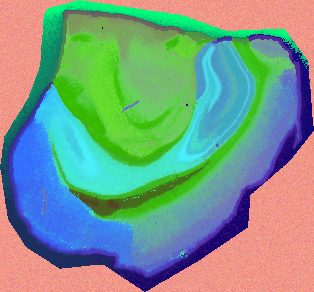

In [10]:
umap_embeddings_cosine = umap.UMAP(n_components=3, n_neighbors=150, min_dist=0.3, verbose=True, output_metric='cosine'
).fit_transform(vector)

UMAP(min_dist=0.3, n_components=3, n_neighbors=150, output_metric='cosine', verbose=True)
Tue Apr 23 12:24:50 2024 Construct fuzzy simplicial set
Tue Apr 23 12:24:51 2024 Finding Nearest Neighbors
Tue Apr 23 12:24:51 2024 Building RP forest with 19 trees
Tue Apr 23 12:25:09 2024 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Tue Apr 23 12:35:33 2024 Finished Nearest Neighbor Search
Tue Apr 23 12:35:43 2024 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [25:13]


Tue Apr 23 13:01:18 2024 Finished embedding


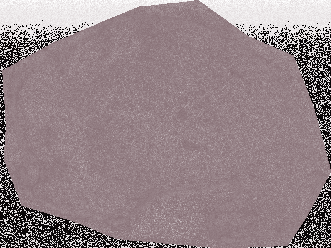

In [11]:
Image.fromarray(embeddings_to_image(umap_embeddings_cosine, img.shape[0], img.shape[1]))

In [9]:
Image.fromarray(embeddings_to_image(umap_embeddings, img.shape[0], img.shape[1])).save("2_umap.png")